<a href="https://colab.research.google.com/github/Mandeep-Singh-Bisla/TwitterEyes-Watching-Sentiments-Unfold/blob/main/sentiment_analysis_using_textblob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumerKey='iL2KI650FefaLUj8X8yh0xKmo'
consumerSecret='bHfmdHDc9wIifVW26Gw9XqAGhpS9XyRAe6HxxWXGzUDtkUf38o'
accessToken='1195745298582106112-EZi82yH3RTahSCBMToXBFlERp7Fxqu'
accessTokenSecret='Fjk9XgOT3y7nug3Z6VXNBQbXrD10HoXRIR52wVdbiGqR7'

In [ ]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#fetching the tweets
#fetching the new tweets
posts= tweepy.Cursor(api.search,q='bharatjodo',lang="en").items(200)
i=1
#fetching the old tweets
oldposts=tweepy.Cursor(api.search,q='iran',lang="en", since='2022-09-01').items(200)
#creating a data frame for old and new tweets
for tweet in posts:
    df= pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
    oldf= pd.DataFrame([tweet.text for tweet in oldposts],columns=['Tweets'])


In [ ]:
oldf.head()

,Tweets
0,"RT @Stardust_1992: Since yesterday, a couple o..."
1,"RT @thatdayin1992: @kwesyduke No, they won't. ..."
2,RT @JonathanHaroun1: During this week’s 72-hou...
3,RT @1500tasvir_en: At the same time as the nat...
4,RT @DCWale_CFC: The Streets will never forget ...


In [ ]:
df.head()


,Tweets
0,@ReallySwara @bharatjodo @RahulGandhi @shammyb...
1,DAY ‘88’HIGHLIGHTS : Bharat Jodo Yatra's today...
2,RT @KrishanKantJha8: .... today is your time\n...
3,@palkisu #bharatjodoyatra is bringing people t...
4,RT @ReallySwara: Here’s a podcast on my experi...


In [ ]:
#cleaning the data
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT

    return text
#cleaning the new data
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,"You are an embodiment of ""Where mind is wi..."
1,DAY ‘88’HIGHLIGHTS : Bharat Jodo Yatra's today...
2,: .... today is your time\n.. Tomorrow it will...
3,bharatjodoyatra is bringing people together. ...
4,: Here’s a podcast on my experience of Yatra...
...,...
194,_bamboria: _dabhi _India …
195,: SaveIDBI\n\n\n_India \n \n\n …
196,: SaveIDBI\n\n\n_India \n \n\n …
197,: Day 1 - At Yatra in leadership of ji .


In [ ]:
#cleaning the old data
oldf['Tweets']=oldf['Tweets'].apply(cleanTxt)
#printing
oldf

,Tweets
0,"_1992: Since yesterday, a couple of political ..."
1,": No, they won't. Instead of reporting real p..."
2,: During this week’s 72-hour nationwide strike...
3,_en: At the same time as the nationwide call f...
4,_CFC: The Streets will never forget how Christ...
...,...
195,": ""[...]Can I travel without the permission of..."
196,: It’s striking to see Isfahan’s normally bust...
197,": ""Be cautious of news of this nature coming o..."
198,: _Commission _EN …


In [ ]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"You are an embodiment of ""Where mind is wi...",0.000000,0.000000
1,DAY ‘88’HIGHLIGHTS : Bharat Jodo Yatra's today...,0.000000,0.000000
2,: .... today is your time\n.. Tomorrow it will...,0.000000,0.000000
3,bharatjodoyatra is bringing people together. ...,0.545455,0.227273
4,: Here’s a podcast on my experience of Yatra...,0.000000,0.000000
...,...,...,...
194,_bamboria: _dabhi _India …,0.000000,0.000000
195,: SaveIDBI\n\n\n_India \n \n\n …,0.000000,0.000000
196,: SaveIDBI\n\n\n_India \n \n\n …,0.000000,0.000000
197,: Day 1 - At Yatra in leadership of ji .,0.000000,0.000000


In [ ]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"You are an embodiment of ""Where mind is wi...",0.000000,0.000000,Neutral
1,DAY ‘88’HIGHLIGHTS : Bharat Jodo Yatra's today...,0.000000,0.000000,Neutral
2,: .... today is your time\n.. Tomorrow it will...,0.000000,0.000000,Neutral
3,bharatjodoyatra is bringing people together. ...,0.545455,0.227273,Positive
4,: Here’s a podcast on my experience of Yatra...,0.000000,0.000000,Neutral
...,...,...,...,...
194,_bamboria: _dabhi _India …,0.000000,0.000000,Neutral
195,: SaveIDBI\n\n\n_India \n \n\n …,0.000000,0.000000,Neutral
196,: SaveIDBI\n\n\n_India \n \n\n …,0.000000,0.000000,Neutral
197,: Day 1 - At Yatra in leadership of ji .,0.000000,0.000000,Neutral


In [ ]:
oldf['Subjectivity']=oldf['Tweets'].apply(getSubjectivity)
oldf['Polarity']=oldf['Tweets'].apply(getPolarity)

oldf

,Tweets,Subjectivity,Polarity
0,"_1992: Since yesterday, a couple of political ...",0.0750,0.000000
1,": No, they won't. Instead of reporting real p...",0.1000,0.066667
2,: During this week’s 72-hour nationwide strike...,0.0000,0.000000
3,_en: At the same time as the nationwide call f...,0.1250,0.000000
4,_CFC: The Streets will never forget how Christ...,0.0000,0.000000
...,...,...,...
195,": ""[...]Can I travel without the permission of...",0.1000,0.000000
196,: It’s striking to see Isfahan’s normally bust...,0.5375,0.137500
197,": ""Be cautious of news of this nature coming o...",0.1000,0.000000
198,: _Commission _EN …,0.0000,0.000000


In [ ]:
oldf['Analysis']=oldf['Polarity'].apply(getAnalysis)
oldf

,Tweets,Subjectivity,Polarity,Analysis
0,"_1992: Since yesterday, a couple of political ...",0.0750,0.000000,Neutral
1,": No, they won't. Instead of reporting real p...",0.1000,0.066667,Positive
2,: During this week’s 72-hour nationwide strike...,0.0000,0.000000,Neutral
3,_en: At the same time as the nationwide call f...,0.1250,0.000000,Neutral
4,_CFC: The Streets will never forget how Christ...,0.0000,0.000000,Neutral
...,...,...,...,...
195,": ""[...]Can I travel without the permission of...",0.1000,0.000000,Neutral
196,: It’s striking to see Isfahan’s normally bust...,0.5375,0.137500,Positive
197,": ""Be cautious of news of this nature coming o...",0.1000,0.000000,Neutral
198,: _Commission _EN …,0.0000,0.000000,Neutral


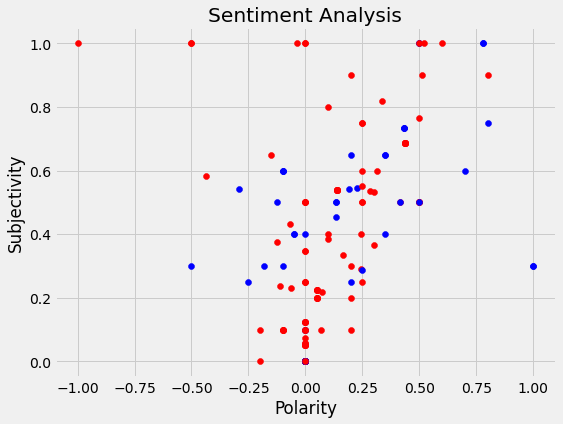

In [ ]:
#ploting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
    plt.scatter(oldf['Polarity'][i],oldf['Subjectivity'][i],color='Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

12.1

In [ ]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

5.5

In [ ]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

82.4

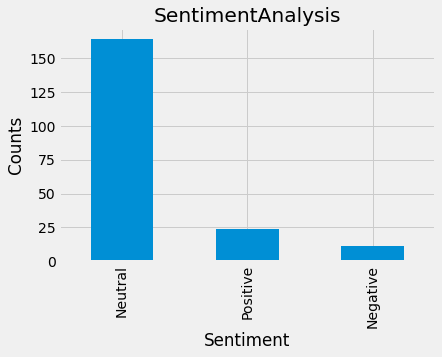

In [ ]:
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
ptweets=oldf[oldf.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/oldf.shape[0])*100,1)

8.5

In [ ]:
ptweets=oldf[oldf.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/oldf.shape[0])*100,1)

57.5

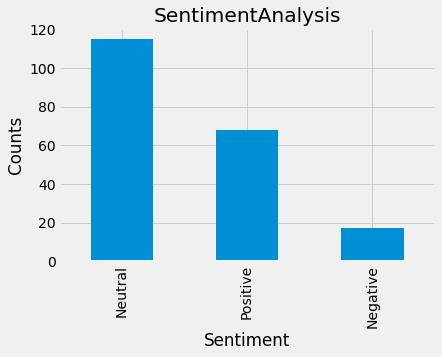

In [ ]:
oldf['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
oldf['Analysis'].value_counts().plot(kind='bar')
plt.show()